<a href="https://colab.research.google.com/github/Mohairy/Sorting-Visualization/blob/main/sprints_microsoft_summer_camp_ai_ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preprocessing & Cleaning

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("heart_disease_uci.csv")
df["num"] = df["num"].apply(lambda x: 1 if x > 0 else 0)


df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [32]:
print("shape of dataset:", df.shape)

shape of dataset: (920, 16)


In [33]:
print("\nMissing values:\n", df.isnull().sum())

# Impute missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == "object":
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)


Missing values:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


/tmp/ipython-input-3014937845.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-3014937845.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [34]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

Categorical columns: ['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal']


,id,age,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,...,dataset_VA Long Beach,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1,63,145.0,233.0,True,150.0,False,2.3,0.0,0,...,False,False,False,True,False,False,False,False,False,False
1,2,67,160.0,286.0,False,108.0,True,1.5,3.0,1,...,False,False,False,False,False,False,True,False,True,False
2,3,67,120.0,229.0,False,129.0,True,2.6,2.0,1,...,False,False,False,False,False,False,True,False,False,True
3,4,37,130.0,250.0,False,187.0,False,3.5,0.0,0,...,False,False,True,False,True,False,False,False,True,False
4,5,41,130.0,204.0,False,172.0,False,1.4,0.0,0,...,False,True,False,False,False,False,False,True,True,False


In [35]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df.select_dtypes(include=['int64','float64','bool']).columns.tolist()
numeric_cols.remove("num")

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


<Figure size 1500x1000 with 0 Axes>

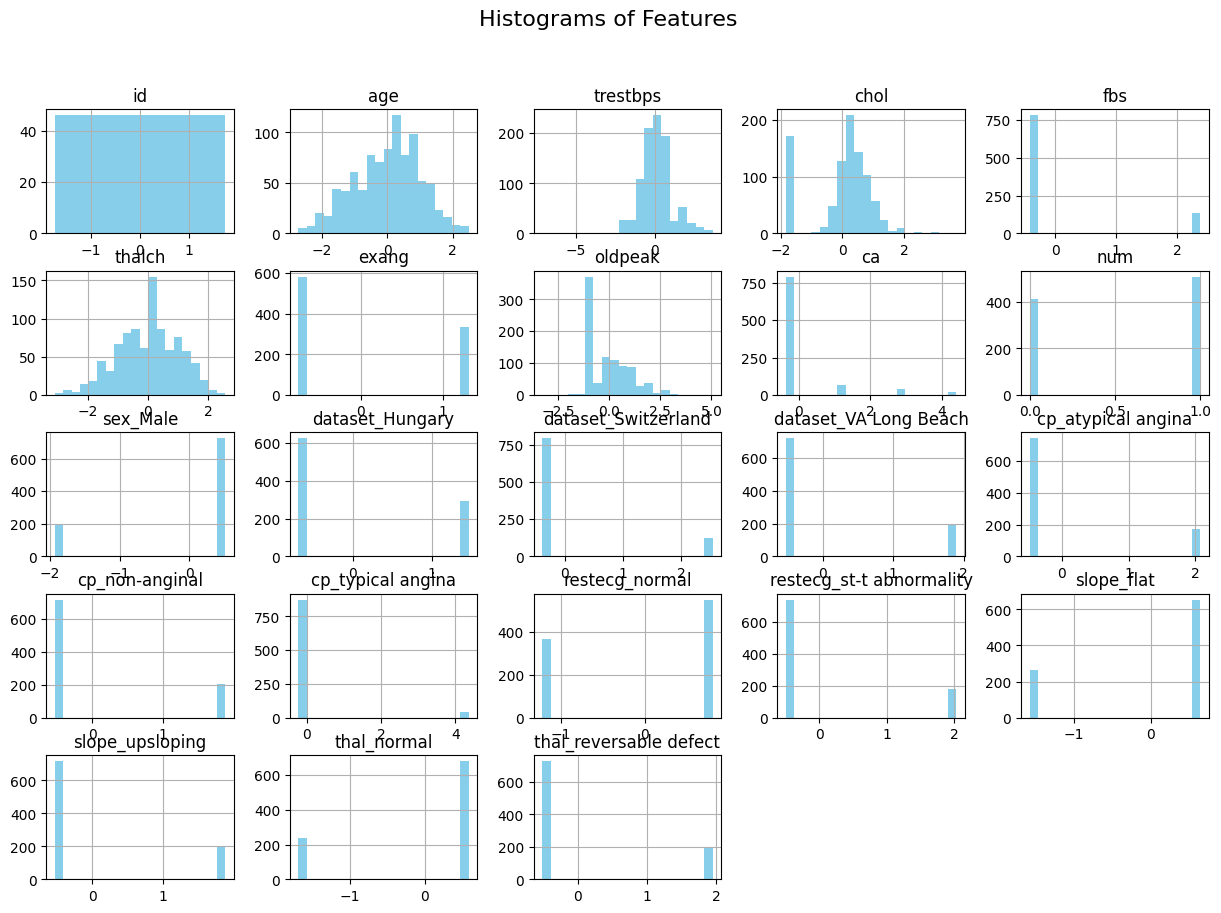

In [36]:
plt.figure(figsize=(15,10))
df.hist(bins=20, figsize=(15,10), color="skyblue")
plt.suptitle("Histograms of Features", fontsize=16)
plt.show()



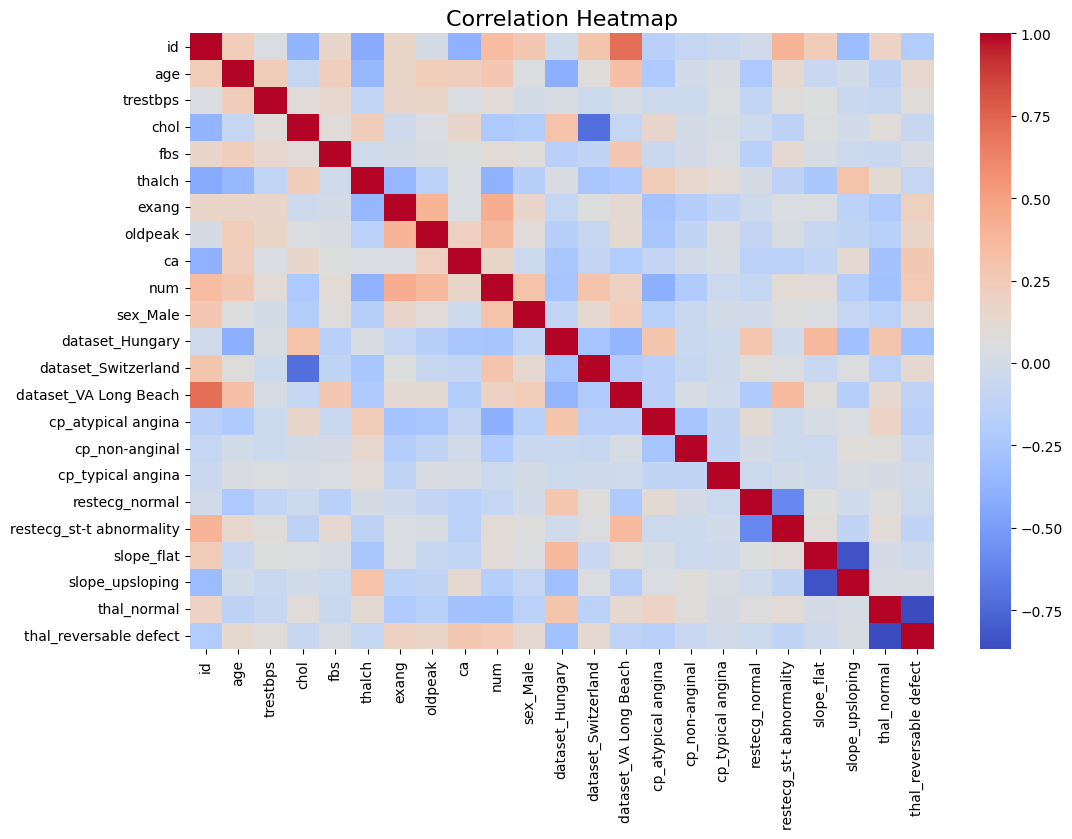

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

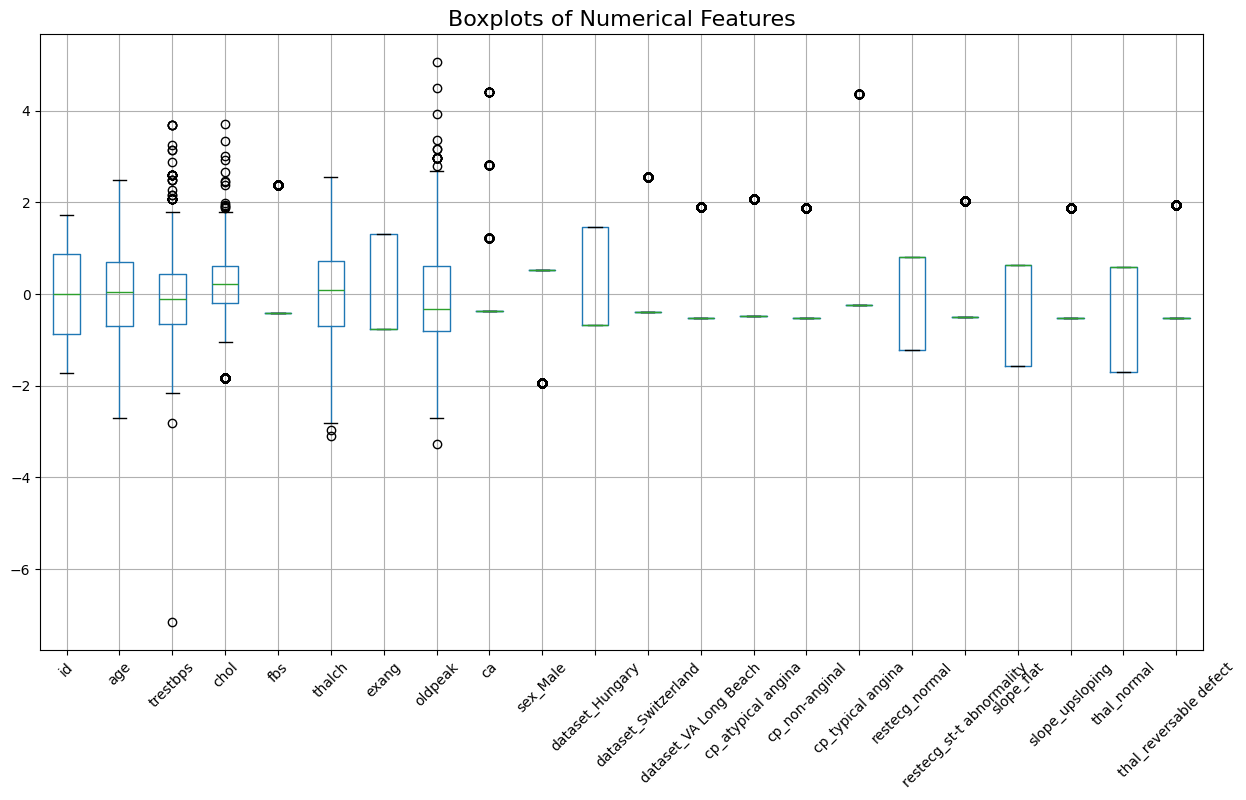

In [38]:
plt.figure(figsize=(15,8))
df[numeric_cols].boxplot()
plt.title("Boxplots of Numerical Features", fontsize=16)
plt.xticks(rotation=45)
plt.show()

##Dimensionality Reduction - PCA

In [39]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Original shape:", X.shape)
print("Scaled shape:", X_scaled.shape)


X = df.drop("num", axis=1)
y = df["num"]

pca = PCA()
X_pca = pca.fit_transform(X)

print("Original shape:", X.shape)
print("Transformed shape:", X_pca.shape)
from sklearn.preprocessing import StandardScaler




Original shape: (920, 22)
Scaled shape: (920, 22)
Original shape: (920, 22)
Transformed shape: (920, 22)


In [40]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

print("Explained variance ratio:\n", explained_variance)

Explained variance ratio:
 [0.15775671 0.13024557 0.09629655 0.09461775 0.06008119 0.05694869
 0.05128517 0.0497192  0.04734004 0.0422062  0.03479046 0.03230585
 0.03128064 0.02379614 0.02024567 0.01870076 0.01757112 0.01142561
 0.01037276 0.0062312  0.00573957 0.00104317]


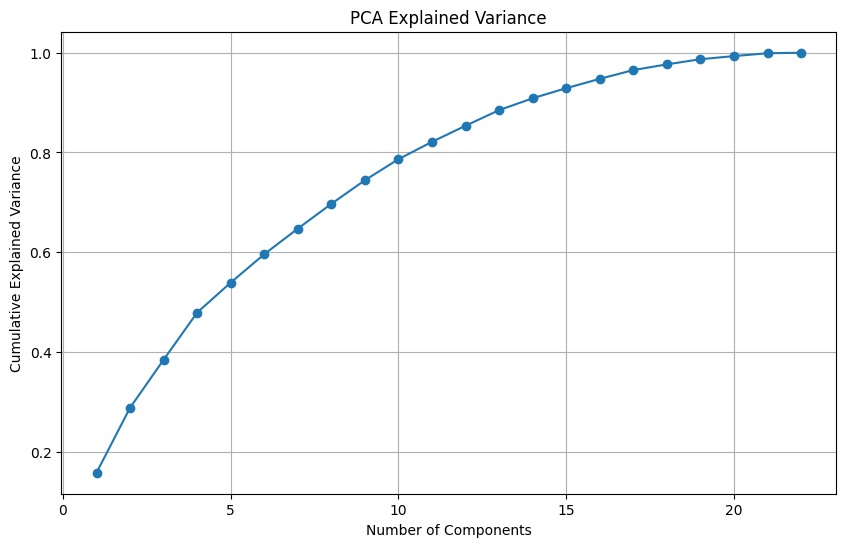

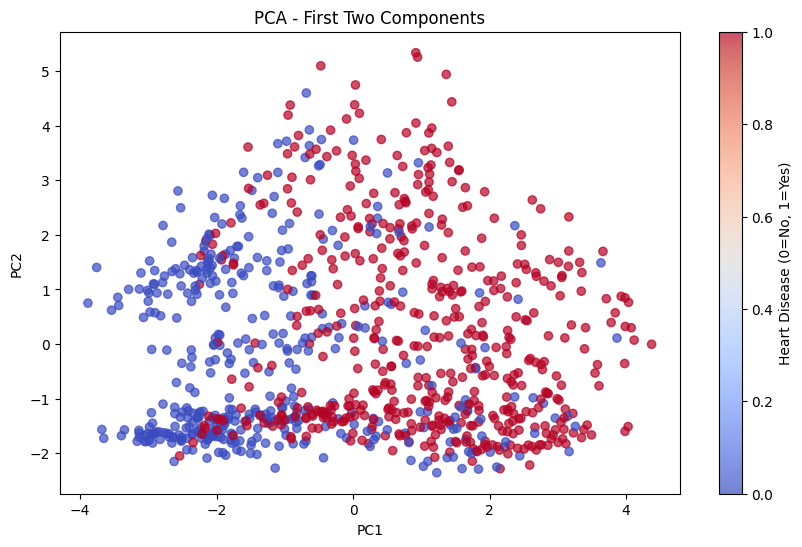

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.show()

# Scatter plot of first 2 PCs
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - First Two Components")
plt.colorbar(label="Heart Disease (0=No, 1=Yes)")
plt.show()

##Feature Selection

/tmp/ipython-input-1342430850.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[:15], y=feature_importances.index[:15], palette="viridis")


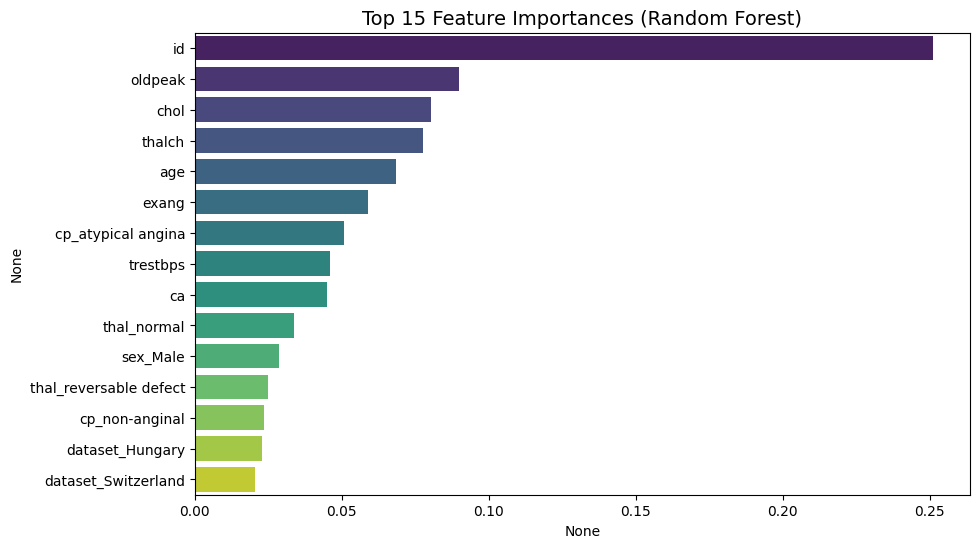

In [42]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop("num", axis=1)
y = df["num"]

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)



plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances[:15], y=feature_importances.index[:15], palette="viridis")
plt.title("Top 15 Feature Importances (Random Forest)", fontsize=14)
plt.show()

In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
rfe = RFE(log_reg, n_features_to_select=10)
rfe.fit(X, y)

rfe_features = X.columns[rfe.support_].tolist()
print("Top features selected by RFE:", rfe_features)

Top features selected by RFE: ['id', 'exang', 'oldpeak', 'ca', 'sex_Male', 'dataset_Hungary', 'dataset_VA Long Beach', 'cp_atypical angina', 'cp_non-anginal', 'thal_normal']


In [44]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

X_chi = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=10)
chi_selector.fit(X_chi, y)

chi_features = X.columns[chi_selector.get_support()].tolist()
print("Top features selected by Chi-Square Test:", chi_features)

Top features selected by Chi-Square Test: ['id', 'exang', 'dataset_Hungary', 'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_atypical angina', 'cp_non-anginal', 'slope_upsloping', 'thal_normal', 'thal_reversable defect']


In [45]:
selected_features = list(set(rfe_features) | set(chi_features))  # union of RFE + Chi2
print("Final selected features:", selected_features)

X_selected = X[selected_features]

Final selected features: ['sex_Male', 'ca', 'dataset_Hungary', 'thal_normal', 'thal_reversable defect', 'dataset_VA Long Beach', 'dataset_Switzerland', 'slope_upsloping', 'exang', 'cp_atypical angina', 'oldpeak', 'cp_non-anginal', 'id']


##Supervised Learning - Classification Models

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (736, 13) Test shape: (184, 13)


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver="liblinear"),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"{name} trained successfully")

Logistic Regression trained successfully
Decision Tree trained successfully
Random Forest trained successfully
SVM trained successfully


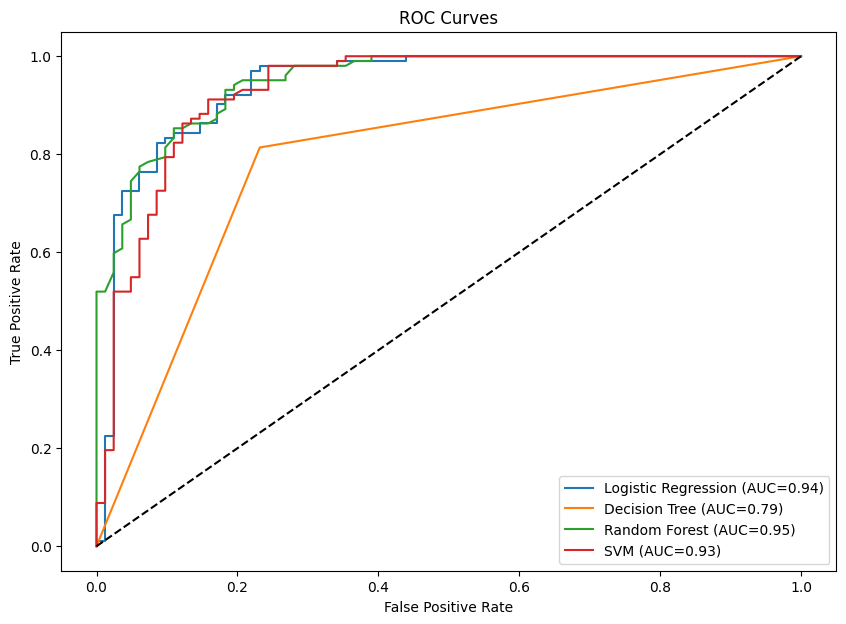

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.864130,0.846847,0.921569,0.882629,0.941296
1,Decision Tree,0.793478,0.813725,0.813725,0.813725,0.791009
2,Random Forest,0.858696,0.858491,0.892157,0.875000,0.950024
3,SVM,0.858696,0.827586,0.941176,0.880734,0.932030


In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

results = []
plt.figure(figsize=(10,7))

for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    results.append([name, acc, prec, rec, f1, auc])


    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")


plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()


results_df = pd.DataFrame(results, columns=["Model","Accuracy","Precision","Recall","F1-Score","ROC-AUC"])
results_df

##Unsupervised Learning – Clustering

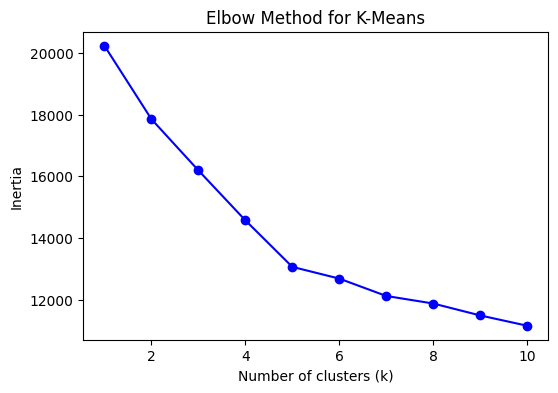

KMeans ARI: 0.328653919947073
KMeans Silhouette: 0.1238544184041922


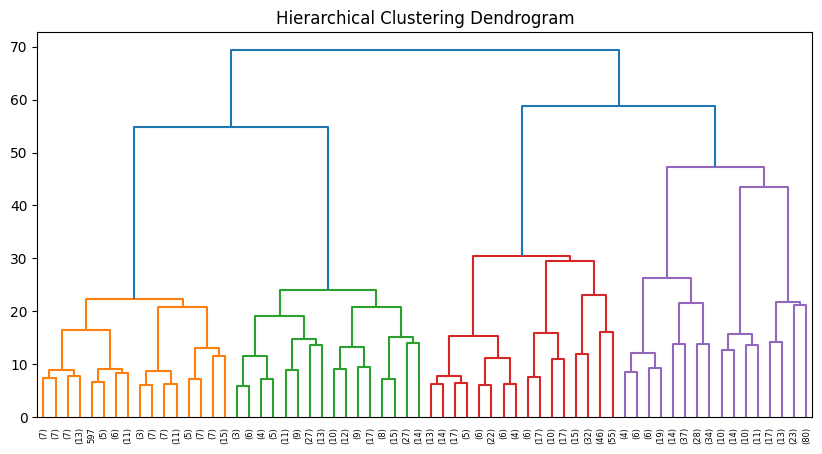

Hierarchical ARI: 0.10437795841237665
Hierarchical Silhouette: 0.13573446795084906


In [51]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(6,4))
plt.plot(K, inertias, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.show()


kmeans = KMeans(n_clusters=2, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)


print("KMeans ARI:", adjusted_rand_score(y, labels_kmeans))
print("KMeans Silhouette:", silhouette_score(X_scaled, labels_kmeans))


linked = linkage(X_scaled, method="ward")

plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


hc = AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage="ward")
labels_hc = hc.fit_predict(X_scaled)


print("Hierarchical ARI:", adjusted_rand_score(y, labels_hc))
print("Hierarchical Silhouette:", silhouette_score(X_scaled, labels_hc))



##Model Export & Deployment

In [53]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


rf_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params,
                       scoring="f1", cv=5, n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)

print("Best RF Params:", grid_rf.best_params_)
print("Best RF Score:", grid_rf.best_score_)


svm_params = {
    "C": [0.1, 1, 10],
    "gamma": ["scale", "auto"],
    "kernel": ["rbf", "linear"]
}
grid_svm = GridSearchCV(SVC(probability=True, random_state=42), svm_params,
                        scoring="f1", cv=5, n_jobs=-1, verbose=1)
grid_svm.fit(X_train, y_train)

print("Best SVM Params:", grid_svm.best_params_)
print("Best SVM Score:", grid_svm.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best RF Params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best RF Score: 0.8905967502922181
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best SVM Params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best SVM Score: 0.8693089770051194


In [54]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(random_state=42))
])


pipeline.fit(X, y)


joblib.dump(pipeline, "heart_disease_model.pkl")

print("Model saved successfully as heart_disease_model.pkl")


Model saved successfully as heart_disease_model.pkl


In [55]:
# Load model
loaded_model = joblib.load("heart_disease_model.pkl")

# Predict on new data (X_test as example)
y_pred = loaded_model.predict(X[:5])
print("Predictions on sample:", y_pred)

Predictions on sample: [0 1 1 0 0]
